In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd # To load files and perform tasks
import numpy as np # linear algebra
import seaborn as sns  # data visualizations
import matplotlib.pyplot as plt # data visualizations
import plotly  #  interactive plotting library 

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import nltk
nltk.download('stopwords')
nltk.download('punkt')

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Irene\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Irene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('whole.csv')
df.head(2)

,Job Title,Job Title final,Salary Estimate,Salary Estimate_low,Salary Estimate_high,Salary Estimate_average,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",Data Analyst,37K-66K (Glassdoor est.),37,66,51.5,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,100 to 500 million (USD),-1,TRUE
1,Quality Data Analyst,Data Analyst,37K-66K (Glassdoor est.),37,66,51.5,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,2 to 5 billion (USD),-1,-1


## (1) Top 10 Most Frequent Skills

In [ ]:
def skill_freq(job_descrip):
    
    tokens = word_tokenize(job_descrip)
    words = [w.lower() for w in tokens]  
    freq = FreqDist(words)
    sorted_freq = sorted(freq.items(), key = lambda k:k[1], reverse = True) # k[1] is frequency
    df_sorted_freq = pd.DataFrame(sorted_freq, columns = ["Word","Frequency"]) 
    skills = ['python','sql','r','excel','tableau','bi','c','c++','java','hadoop','scala','aws', 'flask','pandas','spark','scikit',
                      'numpy','php','mysql','css','mongdb','mango','nltk','flink','fastai','keras','pytorch','tensor','tensorflow',
                    'linux','ruby','javascript','django','react','reactjs','ai','ui']  # list of 30+ skills
    df_sorted_freq = df_sorted_freq[df_sorted_freq['Word'].isin(skills)].reset_index(drop=True) # Identify most frequent skills
    return df_sorted_freq[:10] # select top 10 skills


In [ ]:
# Data Scientist
df_ds = df[df['Job Title final'].str.contains('Data Scientist')]
words_ds = " ".join(df_ds['Job Description'])
skill_freq(words_ds)

,Word,Frequency
0,sql,2997
1,python,2636
2,r,1507
3,aws,1168
4,spark,1135
5,tableau,858
6,excel,794
7,hadoop,787
8,java,772
9,bi,719


In [ ]:
# Data Engineer
df_de = df[df['Job Title final'].str.contains('Data Engineer')]
words_de = " ".join(df_de['Job Description'])
skill_freq(words_de)

,Word,Frequency
0,sql,2144
1,python,1925
2,aws,1501
3,spark,1184
4,java,1082
5,hadoop,903
6,scala,493
7,bi,442
8,linux,428
9,tableau,363


In [ ]:
# Business Analyst
df_ba = df[df['Job Title final'].str.contains('Business Analyst')]
words_ba = " ".join(df_ba['Job Description'])
skill_freq(words_ba)

,Word,Frequency
0,sql,1630
1,excel,1396
2,tableau,639
3,bi,563
4,python,341
5,r,243
6,c,152
7,aws,135
8,java,132
9,javascript,84


In [ ]:
# Data Analyst
df_da = df[df['Job Title final'].str.contains('Data Analyst')]
words_da = " ".join(df_da['Job Description'])
skill_freq(words_da)

,Word,Frequency
0,sql,5348
1,excel,3104
2,tableau,1936
3,python,1746
4,bi,1547
5,r,1268
6,aws,438
7,javascript,433
8,hadoop,339
9,java,335


## (2) Year of Experience Required

In [ ]:
def year_of_experience(job_title, job_descrip):
    experience_req = []
    for t in job_descrip:
        for sentance in t.split('\n'):
            if 'experience' in sentance:
                year = re.findall("\d{1,2}\+? year", sentance)
                if len(year)==1:
                    num = year[0].split(' ')
                    experience_req.append(num[0])

    # Remove the '+' sign after year value
    for n,i in enumerate(experience_req):
        if "+" in i:
            experience_req[n] = re.sub(r'\+','',i)
    experience_req = [int(item) for item in experience_req]

    # Remove outliers
    for n,i in enumerate(experience_req):
        if i >= 20:
            experience_req.pop(n)
            
    # Make a plot
    ax = plt.figure(figsize = (10,5))
    plt.hist(experience_req,bins = list(range(0,21,2)), align = 'left')
    plt.title(f'Experience Required for {job_title}', size = 15)
    plt.ylabel('Bin Count')
    plt.xlabel('Year of Expereience', size = 12)
    plt.show()
    
    # Print sentence of average year of experience
    print_sentence = print(f'The average year of experience required for {job_title} is {round(np.mean(experience_req),2)} years')
    
    return ax, print_sentence

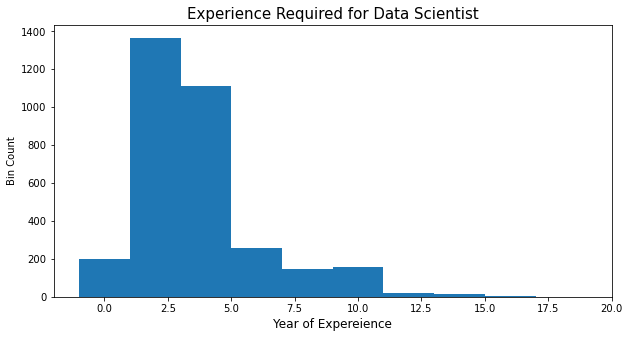

The average year of experience required for Data Scientist is 4.25 years


(<Figure size 720x360 with 1 Axes>, None)

In [ ]:
year_of_experience(job_title='Data Scientist',job_descrip=df_ds['Job Description'].values)

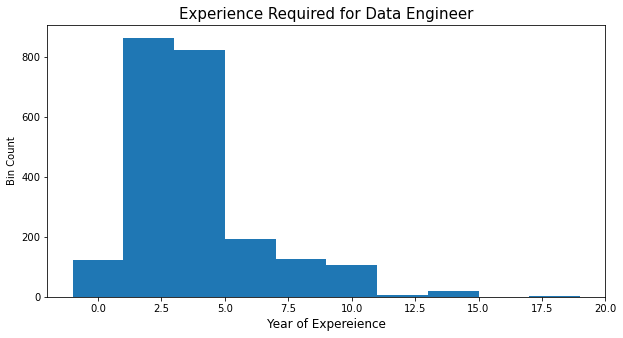

The average year of experience required for Data Engineer is 4.42 years


(<Figure size 720x360 with 1 Axes>, None)

In [ ]:
year_of_experience('Data Engineer',df_de['Job Description'].values)

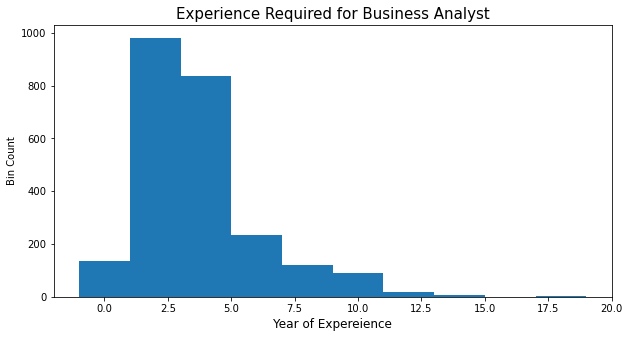

The average year of experience required for Business Analyst is 4.29 years


(<Figure size 720x360 with 1 Axes>, None)

In [ ]:
year_of_experience('Business Analyst',df_ba['Job Description'].values)

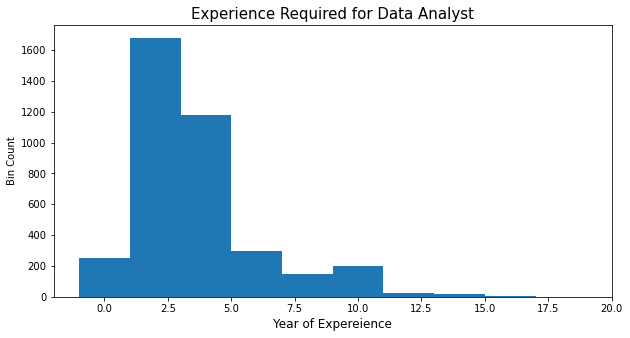

The average year of experience required for Data Analyst is 4.16 years


(<Figure size 720x360 with 1 Axes>, None)

In [ ]:
year_of_experience('Data Analyst',df_da['Job Description'].values)

## (3) Degree Requirement 

In [ ]:
def percentage_of_degree(job_title, job_descrip):
    # Define regex pattern and seach for PhD
    pattern = re.compile('(?i)\WPh.?D\W')
    pattern2 = re.compile('(?i)\WDoctorate\W')
    count = 0
    for t in job_descrip:
        if pattern.search(t):
            count +=1
        elif pattern2.search(t):
            count +=1
    degree = {"PhD": count}

    # Define regex pattern and seach for Master 
    pattern = re.compile("(?i)\WMasters?'?s?\W")
    pattern2 = re.compile('(?i)\WM.?S\W')
    count = 0
    for t in job_descrip:
        if pattern.search(t):
            count +=1
        elif pattern2.search(t):
            count +=1
    degree.update({"Master":count})

    # Define regex pattern and seach for Bachelor
    pattern = re.compile("(?i)\WBachelors?'?s?\W")
    pattern2 = re.compile('(?i)\WB.?S\W')
    count = 0
    for t in job_descrip:
        if pattern.search(t):
            count +=1
        elif pattern2.search(t):
            count +=1
    degree.update({"Bachelor":count})

    # Creat a data frame for counts and percentages
    degree = pd.DataFrame.from_dict(degree,orient='index',
                           columns=[ 'count'])
    degree['ptg'] = degree['count']/len(job_descrip)

    # Make a plot
    ax =degree['ptg'].plot(kind = "bar", figsize =(10,5))
    ax.set_title(f'Degree Requirement Percentage for {job_title}')
    ax.set_xticklabels(degree.index)
    ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
    plt.show()
    
    return ax

<ipython-input-33-a5ed3636589d>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


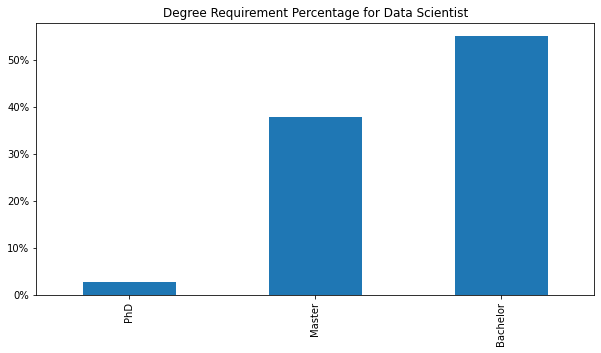

<AxesSubplot:title={'center':'Degree Requirement Percentage for Data Scientist'}>

In [ ]:
percentage_of_degree('Data Scientist', df_da['Job Description'].values)

<ipython-input-33-a5ed3636589d>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


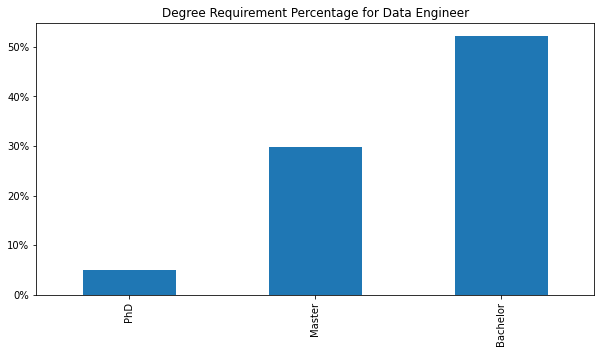

<AxesSubplot:title={'center':'Degree Requirement Percentage for Data Engineer'}>

In [ ]:
percentage_of_degree('Data Engineer', df_de['Job Description'].values)

<ipython-input-33-a5ed3636589d>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


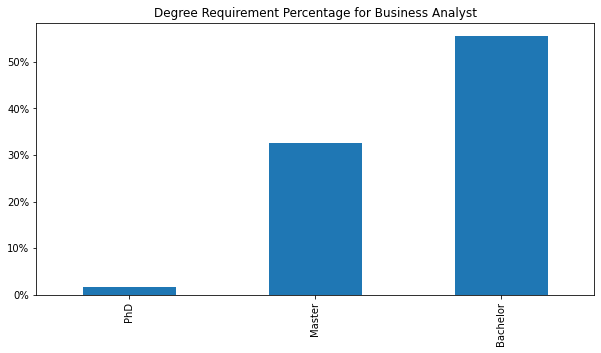

<AxesSubplot:title={'center':'Degree Requirement Percentage for Business Analyst'}>

In [ ]:
percentage_of_degree('Business Analyst', df_ba['Job Description'].values)

<ipython-input-33-a5ed3636589d>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


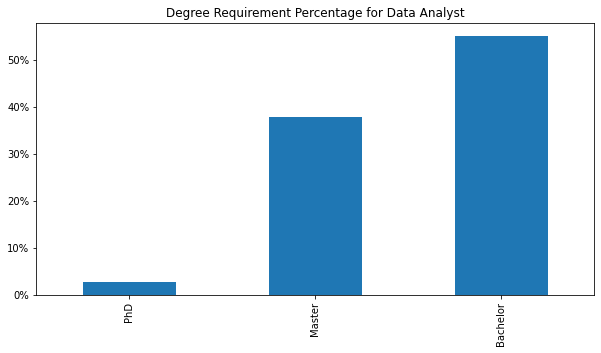

<AxesSubplot:title={'center':'Degree Requirement Percentage for Data Analyst'}>

In [ ]:
percentage_of_degree('Data Analyst', df_da['Job Description'].values)